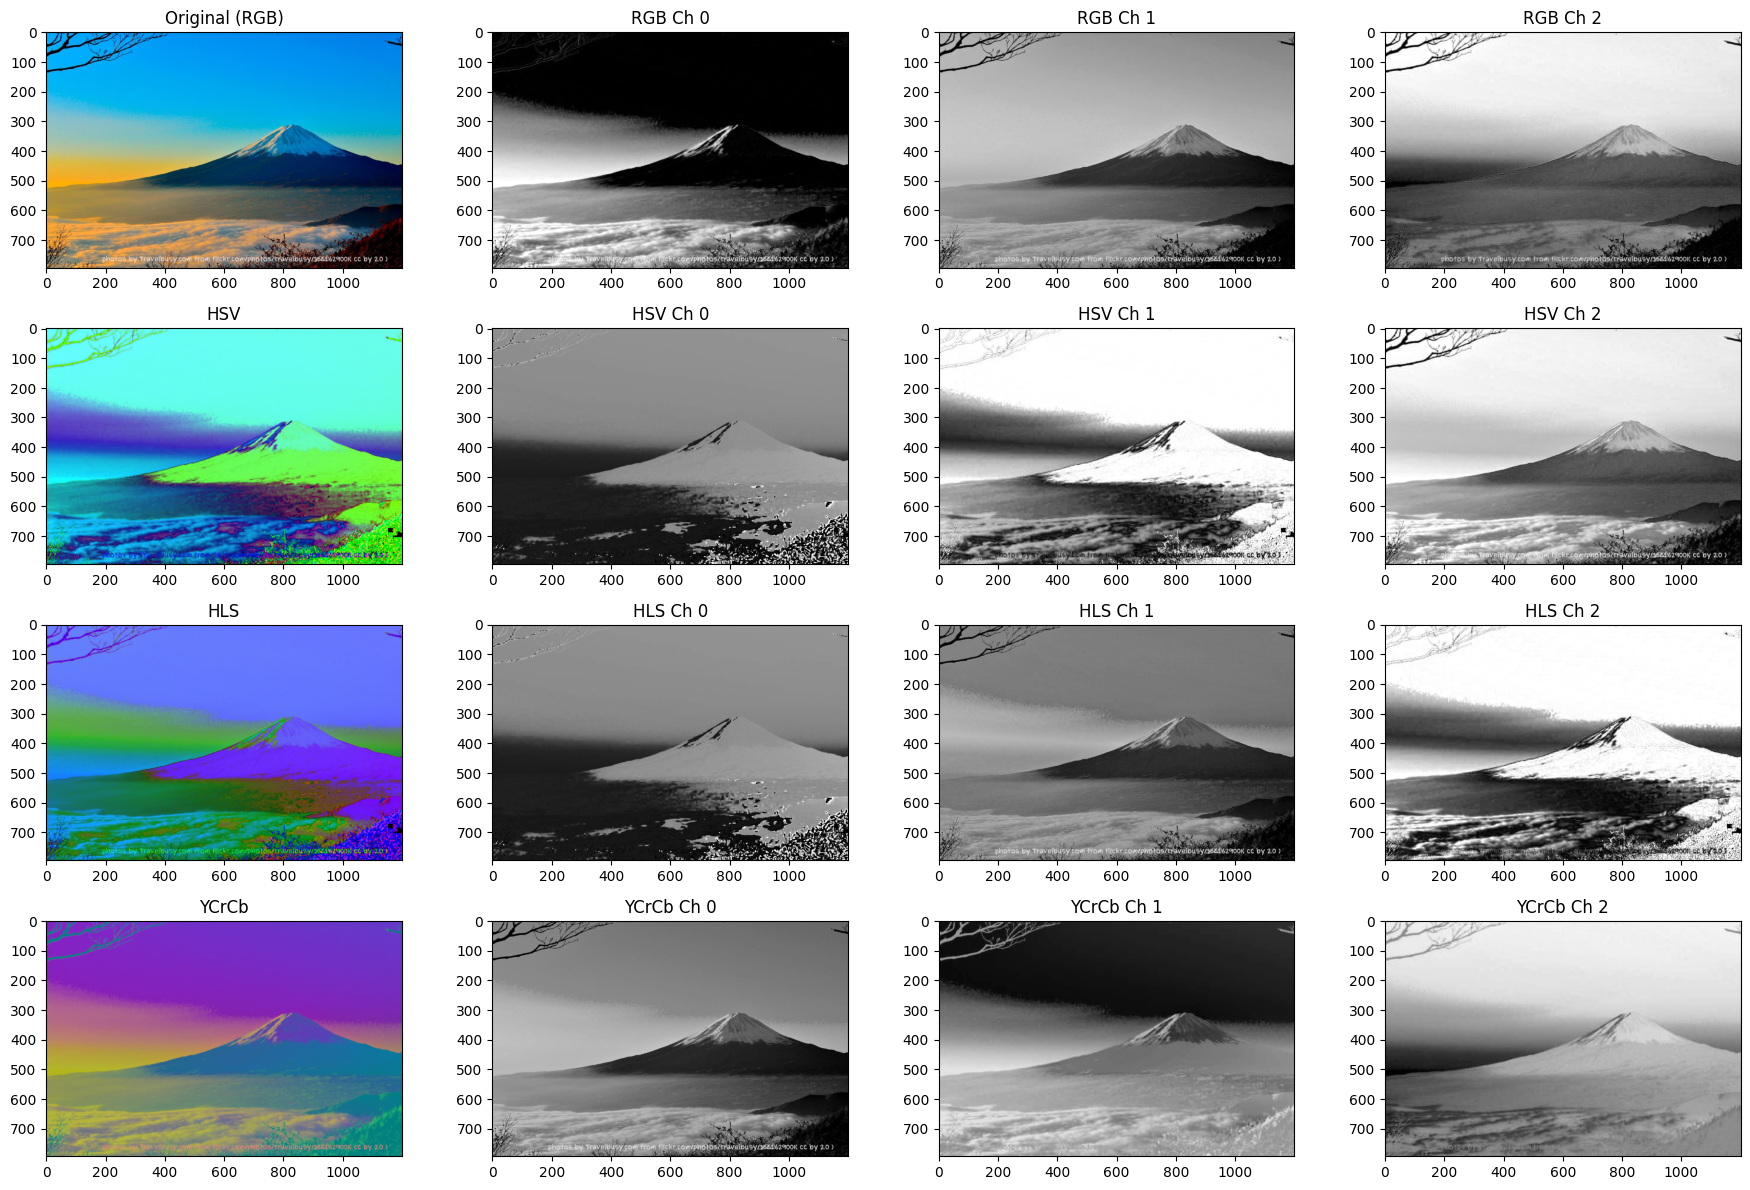

In [1]:
import cv2
import matplotlib.pyplot as plt

def visualize_color_channels(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to RGB, HSV, HLS, and YCrCb color spaces
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

    # Split the RGB image into color channels
    channels_rgb = cv2.split(img_rgb)

    # Split the HSV image into color channels
    channels_hsv = cv2.split(img_hsv)

    # Split the HLS image into color channels
    channels_hls = cv2.split(img_hls)

    # Split the YCrCb image into color channels
    channels_ycrcb = cv2.split(img_ycrcb)

    # Visualize RGB, HSV, HLS, and YCrCb color channels
    fig, axs = plt.subplots(4, 4, figsize=(18, 12))

    axs[0, 0].imshow(img_rgb)
    axs[0, 0].set_title("Original (RGB)")

    for i, channel in enumerate(channels_rgb):
        axs[0, i + 1].imshow(channel, cmap="gray")
        axs[0, i + 1].set_title(f"RGB Ch {i}")

    axs[1, 0].imshow(img_hsv)
    axs[1, 0].set_title("HSV")

    for i, channel in enumerate(channels_hsv):
        axs[1, i + 1].imshow(channel, cmap="gray")
        axs[1, i + 1].set_title(f"HSV Ch {i}")

    axs[2, 0].imshow(img_hls)
    axs[2, 0].set_title("HLS")

    for i, channel in enumerate(channels_hls):
        axs[2, i + 1].imshow(channel, cmap="gray")
        axs[2, i + 1].set_title(f"HLS Ch {i}")

    axs[3, 0].imshow(img_ycrcb)
    axs[3, 0].set_title("YCrCb")

    for i, channel in enumerate(channels_ycrcb):
        axs[3, i + 1].imshow(channel, cmap="gray")
        axs[3, i + 1].set_title(f"YCrCb Ch {i}")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace "path/to/your/image.jpg" with the path to your image
    image_path = "D:/ce 60/3/3d1/IMAGE PROCESSING/lab 3/1547811146.jpg"

    # Visualize RGB, HSV, HLS, and YCrCb color channels in one window
    visualize_color_channels(image_path)


In [2]:
import cv2
import numpy as np

video_output_path = "output_video.mp4" 
image1 = cv2.imread("D:/ce 60/3/3d1/IMAGE PROCESSING/lab 3/1547811146.jpg")
image2 = cv2.imread("D:/ce 60/3/3d1/IMAGE PROCESSING/lab 3/1547811146.jpg")
fourcc = cv2.VideoWriter_fourcc(*'XVID')

video_writer = cv2.VideoWriter(video_output_path, fourcc, 10, (1280, 720))
w1 = 0.0
w2 = 1.0
weight_array = np.full((720, 1280), w1, dtype=np.float32)
steps = 0.05 

image_height, image_width = 100, 100  
x_start = 100  
y_start = 100  
x_end = x_start + image_width
y_end = y_start + image_height
weight_array[y_start:y_end, x_start:x_end] = w2
np.save('weight_array.npy', weight_array)
numframes = 200 
isW1 = True
isW2 = False
for i in range(numframes) :
    resized_image1 = cv2.resize(image1, (weight_array.shape[1], weight_array.shape[0]))
    resized_image2 = cv2.resize(image2, (weight_array.shape[1], weight_array.shape[0]))
    result = cv2.addWeighted(resized_image1,w1,resized_image2,w2,0)

    if w1 >= 1 and w2 <= 0 :
        isW2 = True
        isW1 = False
    elif w1 <= 0 and w2 >= 1 :
        isW2 = False
        isW1 = True

    if isW1 :
        w1 += steps
        w2 -= steps
    elif isW2 :
        w1 -= steps
        w2 += steps
    
    video_writer.write(result)

video_writer.release()

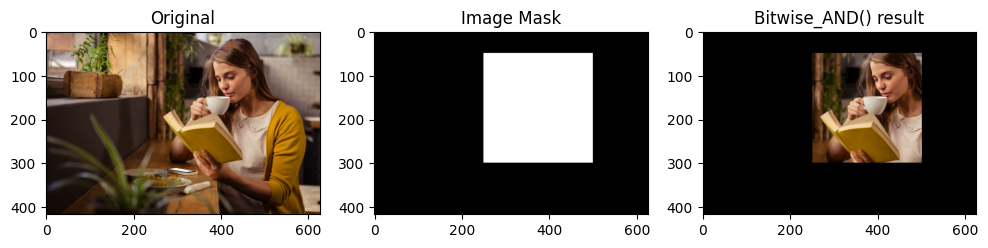

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_mask(image_path, x, y, object_size):
    # Read the image
    img = cv2.imread(image_path)

    # Create a zeros array with the same shape as the image
    mask = np.zeros_like(img)

    # Fill 255 in the object area of the mask
    mask[y:y+object_size, x:x+object_size] = [255, 255, 255]

    # Use bitwise AND operation to mask only the object area from the original image
    masked_img = cv2.bitwise_and(img, mask)

    return img, mask, masked_img

if __name__ == "__main__":
    # Replace "path/to/your/image.jpg" with the path to your image
    image_path = "D:/ce 60/3/3d1/IMAGE PROCESSING/Reading-1.jpg"

    # Set the pixel coordinates and object size
    x, y = 250, 50
    object_size = 250

    # Create mask and plot the result in subplots
    img, mask, masked_img = create_mask(image_path, x, y, object_size)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original")

    axs[1].imshow(mask)
    axs[1].set_title("Image Mask")

    axs[2].imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    axs[2].set_title("Bitwise_AND() result")

    plt.show()
